# Model Training

## Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In [3]:
train_df = pd.read_csv("Train_set_OHEencoded.csv")
train_df.drop(labels="Unnamed: 0", axis=1, inplace=True)    

In [4]:
train_df

,Duration,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,170,0.0,3897.0,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,1,0
1,445,2.0,7662.0,1,5,2019,13,15,5,50,...,0,0,0,0,0,0,0,0,1,0
2,1140,2.0,13882.0,9,6,2019,4,25,9,25,...,0,0,0,0,0,0,0,0,1,0
3,325,1.0,6218.0,12,5,2019,23,30,18,5,...,0,0,0,0,0,0,0,0,1,0
4,285,1.0,13302.0,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,150,0.0,4107.0,9,4,2019,22,25,19,55,...,0,0,0,0,0,0,0,0,1,0
10677,155,0.0,4145.0,27,4,2019,23,20,20,45,...,0,0,0,0,0,0,0,0,1,0
10678,180,0.0,7229.0,27,4,2019,11,20,8,20,...,0,0,0,0,0,0,0,0,1,0
10679,160,0.0,12648.0,1,3,2019,14,10,11,30,...,0,0,0,0,0,0,0,0,1,0


In [5]:
test_df = pd.read_csv("Test_set_OHEencoded.csv")
test_df.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [6]:
test_df

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,655,1.0,6,6,2019,4,25,17,30,0,...,0,0,0,0,0,0,0,0,1,0
1,240,1.0,12,5,2019,10,20,6,20,0,...,0,0,0,0,0,0,0,0,1,0
2,1425,1.0,21,5,2019,19,0,19,15,0,...,0,0,0,0,0,1,0,0,0,0
3,780,1.0,21,5,2019,21,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
4,170,0.0,24,6,2019,2,45,23,55,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,1435,1.0,6,6,2019,20,25,20,30,0,...,0,0,0,0,0,0,0,0,1,0
2666,155,0.0,27,3,2019,16,55,14,20,0,...,0,0,0,0,0,0,0,0,1,0
2667,395,1.0,6,3,2019,4,25,21,50,0,...,0,0,0,0,0,0,0,0,1,0
2668,915,1.0,6,3,2019,19,15,4,0,0,...,0,0,0,0,0,0,0,0,1,0


## Data seperation as X and y

In [7]:
y = train_df["Price"]
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10676     4107.0
10677     4145.0
10678     7229.0
10679    12648.0
10680    11753.0
Name: Price, Length: 10681, dtype: float64

In [8]:
X = train_df.drop(labels="Price", axis=1)
X

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,170,0.0,24,3,2019,1,10,22,20,0,...,0,0,0,0,0,0,0,0,1,0
1,445,2.0,1,5,2019,13,15,5,50,0,...,0,0,0,0,0,0,0,0,1,0
2,1140,2.0,9,6,2019,4,25,9,25,0,...,0,0,0,0,0,0,0,0,1,0
3,325,1.0,12,5,2019,23,30,18,5,0,...,0,0,0,0,0,0,0,0,1,0
4,285,1.0,1,3,2019,21,35,16,50,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,150,0.0,9,4,2019,22,25,19,55,1,...,0,0,0,0,0,0,0,0,1,0
10677,155,0.0,27,4,2019,23,20,20,45,0,...,0,0,0,0,0,0,0,0,1,0
10678,180,0.0,27,4,2019,11,20,8,20,0,...,0,0,0,0,0,0,0,0,1,0
10679,160,0.0,1,3,2019,14,10,11,30,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
X_test = test_df
X_test

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,655,1.0,6,6,2019,4,25,17,30,0,...,0,0,0,0,0,0,0,0,1,0
1,240,1.0,12,5,2019,10,20,6,20,0,...,0,0,0,0,0,0,0,0,1,0
2,1425,1.0,21,5,2019,19,0,19,15,0,...,0,0,0,0,0,1,0,0,0,0
3,780,1.0,21,5,2019,21,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
4,170,0.0,24,6,2019,2,45,23,55,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,1435,1.0,6,6,2019,20,25,20,30,0,...,0,0,0,0,0,0,0,0,1,0
2666,155,0.0,27,3,2019,16,55,14,20,0,...,0,0,0,0,0,0,0,0,1,0
2667,395,1.0,6,3,2019,4,25,21,50,0,...,0,0,0,0,0,0,0,0,1,0
2668,915,1.0,6,3,2019,19,15,4,0,0,...,0,0,0,0,0,0,0,0,1,0


## Data Splitting

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_dev = X_dev.reset_index(drop=True)
y_dev = y_dev.reset_index(drop=True)

In [12]:
X_train.index[X_train["Total_Stops"].isnull() == True]

Int64Index([6936], dtype='int64')

In [13]:
X_train.loc[6935:6940]

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
6935,1345,2.0,9,6,2019,5,25,7,0,0,...,0,0,0,0,0,0,0,0,1,0
6936,1420,NaN,6,5,2019,9,25,9,45,0,...,0,0,0,0,0,0,0,0,1,0
6937,535,1.0,21,3,2019,19,15,10,20,0,...,0,0,0,0,0,0,0,0,1,0
6938,740,1.0,15,5,2019,20,45,8,25,0,...,0,0,0,0,0,0,0,0,1,0
6939,1535,1.0,6,3,2019,6,50,5,15,0,...,0,0,0,0,0,0,0,0,1,0
6940,1025,2.0,18,5,2019,12,35,19,30,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
y_train.loc[6935:6940]

6935    12744.0
6936     7480.0
6937     7531.0
6938    14781.0
6939    11522.0
6940    10368.0
Name: Price, dtype: float64

In [15]:
X_train.drop(index=6936, axis=0, inplace=True)
X_train = X_train.reset_index(drop=True)
y_train.drop(index=6936, axis=0, inplace=True)
y_train = y_train.reset_index(drop=True)

In [16]:
X_train.loc[6935:6940]

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
6935,1345,2.0,9,6,2019,5,25,7,0,0,...,0,0,0,0,0,0,0,0,1,0
6936,535,1.0,21,3,2019,19,15,10,20,0,...,0,0,0,0,0,0,0,0,1,0
6937,740,1.0,15,5,2019,20,45,8,25,0,...,0,0,0,0,0,0,0,0,1,0
6938,1535,1.0,6,3,2019,6,50,5,15,0,...,0,0,0,0,0,0,0,0,1,0
6939,1025,2.0,18,5,2019,12,35,19,30,0,...,0,0,0,0,0,1,0,0,0,0
6940,165,0.0,9,6,2019,8,55,6,10,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
y_train.loc[6935:6940]

6935    12744.0
6936     7531.0
6937    14781.0
6938    11522.0
6939    10368.0
6940     6961.0
Name: Price, dtype: float64

In [18]:
X_dev.isnull().sum()

Duration                             0
Total_Stops                          0
Date                                 0
Month                                0
Year                                 0
Arrival_Hour                         0
Arrival_Minute                       0
Dep_Hour                             0
Dep_Minute                           0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                   

In [19]:
y_dev.isnull().sum()

0

## Feature Scaling

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_X_train = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled_data_X_train, columns=X_train.columns)
y_train_scaled = (y_train - np.mean(y_train)) / np.std(y_train)
scaler2 = StandardScaler()
scaled_data_X_dev = scaler2.fit_transform(X_dev)
X_dev_scaled = pd.DataFrame(scaled_data_X_dev, columns=X_dev.columns)
y_dev_scaled = (y_dev - np.mean(y_dev)) / np.std(y_dev)
scaled_data_X_test = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(scaled_data_X_test, columns=X_test.columns)

In [21]:
X_dev_scaled

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Air Asia,...,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,0.187697,0.220169,-1.231415,1.119850,0.0,-1.391915,0.021332,0.602735,-1.294372,-0.16704,...,-0.050023,0.0,0.0,-0.017667,-0.03535,2.145495,0.0,-0.171911,-1.932387,0.0
1,-0.212179,0.220169,0.544664,0.263054,0.0,0.814942,-1.477981,-0.447042,-1.294372,-0.16704,...,-0.050023,0.0,0.0,-0.017667,-0.03535,2.145495,0.0,-0.171911,-1.932387,0.0
2,-0.914399,-1.231771,1.255096,-1.450539,0.0,-0.362048,0.321194,-0.796968,0.300577,-0.16704,...,-0.050023,0.0,0.0,-0.017667,-0.03535,-0.466093,0.0,-0.171911,0.517495,0.0
3,-0.719338,0.220169,-0.876199,-1.450539,0.0,0.079323,0.021332,-0.622005,1.098052,-0.16704,...,-0.050023,0.0,0.0,-0.017667,-0.03535,-0.466093,0.0,-0.171911,0.517495,0.0
4,-0.885140,-1.231771,0.189448,0.263054,0.0,-1.980410,-0.278531,1.477549,-1.028547,-0.16704,...,-0.050023,0.0,0.0,-0.017667,-0.03535,-0.466093,0.0,-0.171911,0.517495,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,0.197450,0.220169,0.899880,0.263054,0.0,1.109189,-1.477981,-0.796968,0.300577,-0.16704,...,-0.050023,0.0,0.0,-0.017667,-0.03535,-0.466093,0.0,-0.171911,0.517495,0.0
3201,-0.933905,-1.231771,-0.876199,1.119850,0.0,-1.686163,-0.278531,1.827474,0.300577,-0.16704,...,-0.050023,0.0,0.0,-0.017667,-0.03535,-0.466093,0.0,-0.171911,0.517495,0.0
3202,-0.085389,0.220169,-0.876199,-1.450539,0.0,0.814942,-0.578393,-0.622005,-0.762722,-0.16704,...,-0.050023,0.0,0.0,-0.017667,-0.03535,-0.466093,0.0,-0.171911,0.517495,0.0
3203,0.246215,0.220169,0.544664,0.263054,0.0,-0.509172,-1.178118,1.477549,-0.762722,-0.16704,...,-0.050023,0.0,0.0,-0.017667,-0.03535,-0.466093,0.0,-0.171911,0.517495,0.0


In [22]:
y_dev_scaled

0       0.217870
1       0.457593
2      -0.406001
3       1.587265
4      -0.504884
          ...   
3200   -0.402838
3201   -0.977794
3202    1.233056
3203    0.993544
3204   -0.792678
Name: Price, Length: 3205, dtype: float64

## Model Building

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr_train_pred = lr.predict(X_train)
lr_dev_pred = lr.predict(X_dev)

In [25]:
lr_train_pred

array([ 8447.97802573,  3694.56006418, 13148.3423087 , ...,
       12176.61441884,  4880.43453752,  5492.49834998])

In [26]:
y_train

0        6117.0
1        3210.0
2        7904.0
3       13584.0
4       10697.0
         ...   
7470    16263.0
7471     6600.0
7472     9296.0
7473     5277.0
7474     7298.0
Name: Price, Length: 7475, dtype: float64

In [27]:
lr_dev_pred

array([10319.44763869,  9298.10399084,  6118.17612297, ...,
       12151.39194268, 13050.73631755,  5949.43040001])

In [28]:
lr.coef_

array([ 2.92864737e-01,  2.40215510e+03, -6.46048217e+01, -3.57680565e+02,
        2.89128366e-09, -1.13003092e+01,  2.74621101e+00,  1.86257838e+01,
       -2.55590022e+00, -4.89282413e+03, -3.19465162e+03, -4.86903656e+03,
       -4.65136852e+03,  1.24694363e+03,  3.44410354e+04, -9.76960726e+02,
       -6.37769669e+02, -5.05362836e+03, -6.93933326e+03, -2.73130276e+03,
       -1.74110342e+03,  3.24750908e+02,  1.02545508e+02,  2.31790787e+02,
        1.41051751e+02, -8.00138955e+02,  1.41051751e+02,  2.31790787e+02,
       -1.08292929e+03, -8.00138955e+02,  1.02545508e+02,  1.40768019e+03,
        3.22334737e+03,  8.09960914e+03,  7.49054994e+03,  6.49423982e+03,
        1.26477969e+03, -8.34571725e+03, -6.77864314e+03, -5.07360527e+03,
       -4.77518852e+03, -1.59937178e+03])

#### Evaluating Model Performance

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

lr_train_mse = mean_squared_error(y_true=y_train, y_pred=lr_train_pred)
lr_train_mae = mean_absolute_error(y_true=y_train, y_pred=lr_train_pred)
lr_train_r2 = r2_score(y_true=y_train, y_pred=lr_train_pred)

lr_dev_mse = mean_squared_error(y_true=y_dev, y_pred=lr_dev_pred)
lr_dev_mae = mean_absolute_error(y_true=y_dev, y_pred=lr_dev_pred)
lr_dev_r2 = r2_score(y_true=y_dev, y_pred=lr_dev_pred)

# accuracy = accuracy_score(y_dev, lr_dev_pred)
# print("Accuracy:", accuracy)


threshold = 200
diff = abs(y_dev - lr_dev_pred)
accuracy = (diff <= threshold).mean()
accuracy = accuracy*100


In [30]:
lr_results = pd.DataFrame(["LinearRegression", lr_train_mse, lr_train_mae, lr_train_r2, lr_dev_mse, lr_dev_mae, lr_dev_r2, accuracy]).transpose()
lr_results.columns = ["Model", "Training MSE", "Training MAE",  "Training r2", "Dev MSE", "Dev MAE", "Dev r2", "Accuracy(%)"]
lr_results

,Model,Training MSE,Training MAE,Training r2,Dev MSE,Dev MAE,Dev r2,Accuracy(%)
0,LinearRegression,6058977.064475,1712.081315,0.707553,7738496.853292,1873.449648,0.656002,7.73791


### Multivariate Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_dev_poly = poly.fit_transform(X_dev)

In [32]:
X_train_poly.shape

(7475, 946)

In [33]:
mr = LinearRegression()
mr.fit(X_train_poly, y_train)

LinearRegression()

In [34]:
mr_train_pred = mr.predict(X_train_poly)
mr_dev_pred = mr.predict(X_dev_poly)

In [35]:
mr.coef_

array([ 8.10387350e-08,  3.72398351e-06,  1.14569999e-03, -2.81044652e-05,
       -4.51844843e-04, -3.84730563e-08, -6.19947820e-05,  3.12551766e-05,
       -1.69169562e-05,  1.55958212e-05, -1.32085465e-03, -7.62118365e-04,
       -1.15778084e-03, -9.27338346e-04,  2.01030852e-04,  6.56512124e-03,
        1.01765003e-03,  9.00507678e-04, -2.50944547e-03, -1.83398202e-03,
       -1.02497257e-03,  8.52183044e-04,  2.50635215e-04, -7.68251502e-04,
        6.02550836e-04, -1.29190062e-04,  4.42520423e-05, -1.29191471e-04,
        6.02545950e-04, -1.13361775e-03,  4.42536828e-05, -7.68248816e-04,
        1.38425632e-03,  3.66646739e-03,  1.06871438e-03,  3.40585548e-04,
       -1.48190314e-03, -4.24054961e-03, -1.35752563e-03,  7.74889102e-06,
        1.70963360e-03,  3.85599058e-04, -9.87773892e-05,  1.19219476e-04,
        6.96469870e-04, -6.63437859e-04, -1.89587050e-01,  7.34072692e-03,
        2.64804196e-02,  6.64499333e-03, -5.36097841e-03, -5.68535925e-03,
        2.05234852e-01,  

In [36]:
mr_train_pred

array([ 8736.95018962,  4982.58146663, 10035.73569121, ...,
        9841.96764848,  4863.40152173,  7451.10632436])

In [37]:
y_train

0        6117.0
1        3210.0
2        7904.0
3       13584.0
4       10697.0
         ...   
7470    16263.0
7471     6600.0
7472     9296.0
7473     5277.0
7474     7298.0
Name: Price, Length: 7475, dtype: float64

#### Evaluation

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

mr_train_mse = mean_squared_error(y_true=y_train, y_pred=mr_train_pred)
mr_train_mae = mean_absolute_error(y_true=y_train, y_pred=mr_train_pred)
mr_train_r2 = r2_score(y_true=y_train, y_pred=mr_train_pred)

mr_dev_mse = mean_squared_error(y_true=y_dev, y_pred=mr_dev_pred)
mr_dev_mae = mean_absolute_error(y_true=y_dev, y_pred=mr_dev_pred)
mr_dev_r2 = r2_score(y_true=y_dev, y_pred=mr_dev_pred)

threshold = 1000
diff = abs(y_dev - lr_dev_pred)
accuracy = (diff <= threshold).mean()
accuracy = accuracy*100

In [39]:
mr_results = pd.DataFrame(["MultivariateRegression", mr_train_mse, mr_train_mae, mr_train_r2, mr_dev_mse, mr_dev_mae, mr_dev_r2, accuracy]).transpose()
mr_results.columns = ["Model", "Training MSE", "Training MAE", "Training r2", "Dev MSE", "Dev MAE", "Dev r2", "Accuracy(%)"]
mr_results

,Model,Training MSE,Training MAE,Training r2,Dev MSE,Dev MAE,Dev r2,Accuracy(%)
0,MultivariateRegression,3841570.863957,1316.41244,0.81458,5475057.641901,1486.643097,0.756618,36.973479


### Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

lsor = Lasso()
lsor.fit(X_train, y_train)

/home/srini/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.878e+08, tolerance: 1.549e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [41]:
lsor_train_pred = lsor.predict(X_train)
lsor_dev_pred = lsor.predict(X_dev)

In [42]:
lsor_train_pred

array([ 8451.5559066 ,  3694.31569126, 13206.19370135, ...,
       12195.09239174,  4895.82320693,  5533.15678403])

In [43]:
y_train

0        6117.0
1        3210.0
2        7904.0
3       13584.0
4       10697.0
         ...   
7470    16263.0
7471     6600.0
7472     9296.0
7473     5277.0
7474     7298.0
Name: Price, Length: 7475, dtype: float64

#### Evaluating Performance

In [44]:
lsor_train_mse = mean_squared_error(y_true=y_train, y_pred=lsor_train_pred)
lsor_train_mae = mean_absolute_error(y_true=y_train, y_pred=lsor_train_pred)
lsor_train_r2 = r2_score(y_true=y_train, y_pred=lsor_train_pred)

lsor_dev_mse = mean_squared_error(y_true=y_dev, y_pred=lsor_dev_pred)
lsor_dev_mae = mean_absolute_error(y_true=y_dev, y_pred=lsor_dev_pred)
lsor_dev_r2 = r2_score(y_true=y_dev, y_pred=lsor_dev_pred)

diff = abs(y_dev - lsor_dev_pred)
accuracy = (diff <= threshold).mean()
accuracy = accuracy*100

In [45]:
lsor_results = pd.DataFrame(["LassoRegression", lsor_train_mse, lsor_train_mae, lsor_train_r2, lsor_dev_mse, lsor_dev_mae, lsor_dev_r2, accuracy]).transpose()
lsor_results.columns = ["Model", "Training MSE", "Training MAE", "Training r2", "Dev MSE", "Dev MAE", "Dev r2", "Accuracy(%)"]
lsor_results

,Model,Training MSE,Training MAE,Training r2,Dev MSE,Dev MAE,Dev r2,Accuracy(%)
0,LassoRegression,6084441.123671,1717.350901,0.706324,7758840.486545,1873.997903,0.655098,37.00468


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
dtr_train_pred = dtr.predict(X_train)
dtr_dev_pred = dtr.predict(X_dev)

In [48]:
dtr_train_pred

array([6117., 3210., 7904., ..., 9296., 5277., 7298.])

In [49]:
y_train

0        6117.0
1        3210.0
2        7904.0
3       13584.0
4       10697.0
         ...   
7470    16263.0
7471     6600.0
7472     9296.0
7473     5277.0
7474     7298.0
Name: Price, Length: 7475, dtype: float64

In [50]:
dtr_dev_pred

array([10262., 12373.,  6144., ..., 15147., 13941.,  5575.])

In [51]:
y_dev

0       10262.0
1       11399.0
2        7303.0
3       16757.0
4        6834.0
         ...   
3200     7318.0
3201     4591.0
3202    15077.0
3203    13941.0
3204     5469.0
Name: Price, Length: 3205, dtype: float64

#### Evaluation

In [52]:
dtr_train_mse = mean_squared_error(y_true=y_train, y_pred=dtr_train_pred)
dtr_train_mae = mean_absolute_error(y_true=y_train, y_pred=dtr_train_pred)
dtr_train_r2 = r2_score(y_true=y_train, y_pred=dtr_train_pred)

dtr_dev_mse = mean_squared_error(y_true=y_dev, y_pred=dtr_dev_pred)
dtr_dev_mae = mean_absolute_error(y_true=y_dev, y_pred=dtr_dev_pred)
dtr_dev_r2 = r2_score(y_true=y_dev, y_pred=dtr_dev_pred)

diff = abs(y_dev - dtr_dev_pred)
accuracy = (diff <= threshold).mean()
accuracy = accuracy*100

In [53]:
dtr_results = pd.DataFrame(["DecisionTreeRegression", dtr_train_mse, dtr_train_mae, dtr_train_r2, dtr_dev_mse, dtr_dev_mae, dtr_dev_r2, accuracy]).transpose()
dtr_results.columns = ["Model", "Training MSE", "Training MAE", "Training r2", "Dev MSE", "Dev MAE", "Dev r2", "Accuracy(%)"]
dtr_results

,Model,Training MSE,Training MAE,Training r2,Dev MSE,Dev MAE,Dev r2,Accuracy(%)
0,DecisionTreeRegression,61801.063362,30.517396,0.997017,3572271.067369,783.41014,0.841203,77.00468


### Random Forest regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
rfr_train_pred = rfr.predict(X_train)
rfr_dev_pred = rfr.predict(X_dev)

In [56]:
rfr_train_pred

array([6213.62, 3640.5 , 9617.97, ..., 9260.88, 5277.  , 7241.89])

In [57]:
y_train

0        6117.0
1        3210.0
2        7904.0
3       13584.0
4       10697.0
         ...   
7470    16263.0
7471     6600.0
7472     9296.0
7473     5277.0
7474     7298.0
Name: Price, Length: 7475, dtype: float64

In [58]:
rfr_dev_pred

array([10306.1       , 12374.52      ,  6035.55483333, ...,
       14933.55      , 14095.34      ,  5632.02      ])

In [59]:
y_dev

0       10262.0
1       11399.0
2        7303.0
3       16757.0
4        6834.0
         ...   
3200     7318.0
3201     4591.0
3202    15077.0
3203    13941.0
3204     5469.0
Name: Price, Length: 3205, dtype: float64

#### Evaluation

In [60]:
rfr_train_mse = mean_squared_error(y_true=y_train, y_pred=rfr_train_pred)
rfr_train_mae = mean_absolute_error(y_true=y_train, y_pred=rfr_train_pred)
rfr_train_r2 = r2_score(y_true=y_train, y_pred=rfr_train_pred)

rfr_dev_mse = mean_squared_error(y_true=y_dev, y_pred=rfr_dev_pred)
rfr_dev_mae = mean_absolute_error(y_true=y_dev, y_pred=rfr_dev_pred)
rfr_dev_r2 = r2_score(y_true=y_dev, y_pred=rfr_dev_pred)

diff = abs(y_dev - rfr_dev_pred)
accuracy = (diff <= threshold).mean()
accuracy = accuracy*100

In [61]:
rfr_results = pd.DataFrame(["RandomForestRegressor", rfr_train_mse, rfr_train_mae, rfr_train_r2, rfr_dev_mse, rfr_dev_mae, rfr_dev_r2, accuracy]).transpose()
rfr_results.columns = ["Model", "Training MSE", "Training MAE", "Training r2", "Dev MSE", "Dev MAE", "Dev r2", "Accuracy(%)"]
rfr_results

,Model,Training MSE,Training MAE,Training r2,Dev MSE,Dev MAE,Dev r2,Accuracy(%)
0,RandomForestRegressor,342616.87072,254.50558,0.983463,2726549.747081,724.894557,0.878797,80.592824


## Evaluation of all Models

In [62]:
results = pd.concat([lr_results, mr_results, lsor_results,dtr_results, rfr_results], axis=0)
results.reset_index(drop=True)

,Model,Training MSE,Training MAE,Training r2,Dev MSE,Dev MAE,Dev r2,Accuracy(%)
0,LinearRegression,6058977.064475,1712.081315,0.707553,7738496.853292,1873.449648,0.656002,7.73791
1,MultivariateRegression,3841570.863957,1316.41244,0.81458,5475057.641901,1486.643097,0.756618,36.973479
2,LassoRegression,6084441.123671,1717.350901,0.706324,7758840.486545,1873.997903,0.655098,37.00468
3,DecisionTreeRegression,61801.063362,30.517396,0.997017,3572271.067369,783.41014,0.841203,77.00468
4,RandomForestRegressor,342616.87072,254.50558,0.983463,2726549.747081,724.894557,0.878797,80.592824


In [64]:
y_dev.describe()

count     3205.000000
mean      9228.650234
std       4743.711007
min       1759.000000
25%       5228.000000
50%       8529.000000
75%      12592.000000
max      79512.000000
Name: Price, dtype: float64

**MAE is less than Standard deviation**

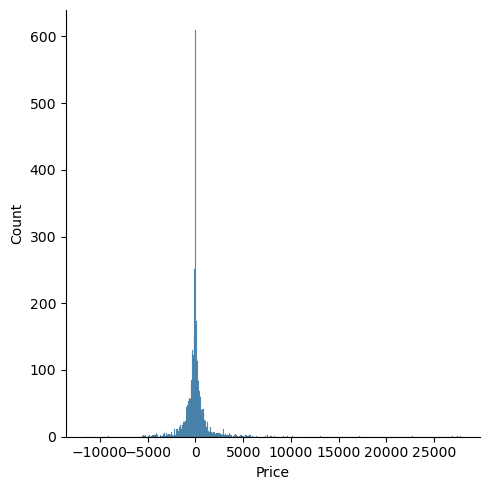

In [63]:
residuals = y_dev - rfr_dev_pred
sns.displot(residuals)

## Testing

In [65]:
dtr_test_pred = dtr.predict(X_test)
dtr_test_pred

array([14714.,  4226., 12898., ..., 15029., 15809.,  7155.])

In [66]:
rfr_test_pred = rfr.predict(X_test)
rfr_test_pred

array([14720.1 ,  4227.97, 12898.  , ..., 16048.62, 14821.04,  7458.77])